## **Assignment 7**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#importing Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score

## Question 1

a) 
Dimension Reduction<br>
input : Grades of 50 courses<br>
output : Most 5 useful numbers <br>
b) Clustering<br>
input : Performance in various courses and extra-curricular activities<br>
ouput : Personality Groups <br>
c) Regression<br>
input : Performance in various courses, extra-curricular activities, and first job type<br>
output : Salary <br>
d) Classification<br>
input : Performance in various courses and extra-curricular activities<br>
output : Job type <br>

## Question 2

| Problem | Framework | Target output variable type | Parameters | Hyper- parameters and their typical value range | Scikit-learn commands for defining, training, and testing
| -- | -- | -- | -- | -- | -- |
|Classification | SVM-C with Gaussian Kernel | One hot encoding - Usually integers  {0,1} or {-1,1} representing labels | 1.Support vectors equation parameters - w,b<br> 2. kernel, max_iter, weights | 1. C (regularization)(from 10^-5 to 10^5), gamma (0.00001 to 1), degree (1 to 10) <br >2.Slack variable and constant C in soft margin SVM <br> 3.Width of Gaussian kernel | sklearn.svm.SVC(), fit(X,y), predict(), score() |
| Regression | SVM-R with Gaussian kernel | floating point | 1.Support vectors equation parameters - w,b<br> 2.kernel, max_iter, weights | 1.degree (1 to 10), gamma (0.00001 to 1), C (regularization)(from 10^-5 to 10^5) <br> 2.Slack variable and constant C in soft margin SVM <br> 3.Width of Gaussian kernel | sklearn.svm.SVR(), fit(X,y), predict(), score() |
| Classification | NN with one hidden layer | One hot encoding - Usually integers  {0,1} or {-1,1} representing labels | 1.Parameters w,b in z = wx +b <br> 2. weights, activation, solver, max_iter | 1.No. of units in hidden layer and learning rate <br> 2. hidden_layer_sizes (1 to 10^5), learning rate (0.00001 to 0.1), regularization (10^-5 to 10^5) | sklearn.neural_network.MLPClassifier(), fit(X,y), predict(), score() |
| Regression | NN with one hidden layer | floating point |1.Parameters w,b in z = wx +b <br> 2.  weights, activation, solver, max_iter | 1.No. of units in hidden layer and learning rate <br> 2. hidden_layer_sizes (1 to 10^5), learning rate (0.00001 to 0.1), regularization (10^-5 to 10^5) | sklearn.neural_network.MLPRegressor(), fit(X,y), predict(), score() |
| Classification | Random forest | 1. One hot encoding - Usually integers  {0,1} or {-1,1} representing labels  | 1.criterion, max_depth<br> 2.NA |1. n_estimators (10 to 10000), min_samples_split(2 to 10)<br>2.Choosing criteria entropy /gini index ;max depth of trees | 1.sklearn.ensemble.RandomForestClassifier(), fit(), predict(), score() <br> 2.tree.DecisionTreeClassifier(),fit(X,y),predict() |
| Regression | Random forest | floating point | 1.NA <br> 2.criterion, max_depth | 1. n_estimators (10 to 10000), min_samples_split(2 to 10) <br> 2.Choosing criteria entropy /gini index ;max depth of trees|1.sklearn.ensemble.RandomForestRegressor(), fit(), predict(), score()<br>2.tree.DecisionTreeRegressor(),fit(X,y),predict() |
| Clustering | k-means | 1.List of cluster labels for each point <br> 2.None | 1.init, n_init, algorithm <br> 2.NA |1.No. of clusters <br> 2. n_clusters(2 to 10), max_iter (100 to 1000)|sklearn.cluster.KMeans(), fit(X), score(),.labels|
| Clustering | DBSCAN |1.List of cluster labels for each point<br> 2. metric, algorithm, n_jobs |1.epsilon,minimum no. of points | eps (0.01 to 1), min_samples | sklearn.cluster.DBSCAN(), fit(), score(),labels|
| Dimension reduction | PCA |1.Eigen vectors - Real no.s <br> 2. None | Gram matrix , svd_solver | 1.K-no. of dimensions in reduced dataset <br> 2.n_components (depends on number of features in dataset) | sklearn.decomposition.PCA(), fit(X), score() |
| Dimension reduction | Kernel PCA |1.Eigen vectors - Real no.s <br> 2. None | Gram matrix - kernel, fit_inverse_transform |1.Choosing suitable kernel parameters & no. of components <br> 2.n_components (depends on number of features), max_iter (100 to 1000), gamma (0.01 to 10) | a = sklearn.decomposition.KernelPCA(),b = a.fit_transform(X)



## Question 3

In [ ]:
# reading csv file with pd.read_csv
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',skiprows=1)

In [ ]:
#Defining coloum headers for the data
cols = ['Date','Rented Bike Count',	'Hour'	,'Temperature(°C)'	,'Humidity(%)'	,'Wind speed (m/s)',	'Visibility (10m)',	
        'Dew point temperature(°C)'	,'Solar Radiation (MJ/m2)',	'Rainfall(mm)'	,'Snowfall (cm)',	'Seasons','Holiday'	,'Functioning Day']
df.columns = cols
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df['Rented Bike Count'].value_counts()


0       295
122      19
223      19
262      19
103      18
       ... 
2379      1
1589      1
1597      1
1605      1
2047      1
Name: Rented Bike Count, Length: 2166, dtype: int64

In [ ]:
data = df.copy()
label_Seasons = data['Seasons'][data['Seasons'].duplicated()==False]
data['Seasons'] = data['Seasons'].replace(list(label_Seasons),range(len(label_Seasons)))
label_Holiday = data['Holiday'][data['Holiday'].duplicated()==False]
data['Holiday'] = data['Holiday'].replace(list(label_Holiday),range(len(label_Holiday)))
label_functioning_day = data['Functioning Day'][data['Functioning Day'].duplicated()==False]
data['Functioning Day'] = data['Functioning Day'].replace(list(label_functioning_day),range(len(label_functioning_day)))
data = data.drop(columns=['Date'])
#data = data.drop(columns=['Dew point temperature(°C)'])
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
2,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
3,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
4,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,0,0,0


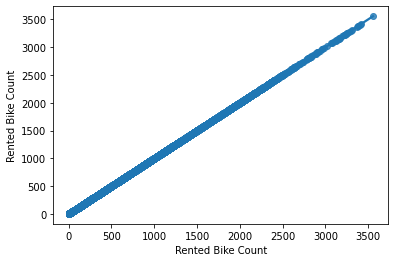

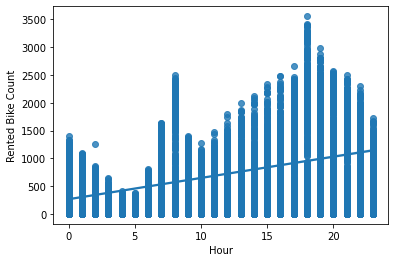

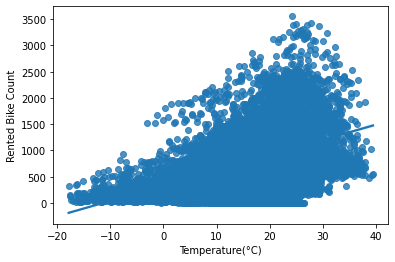

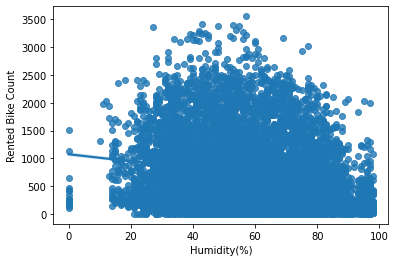

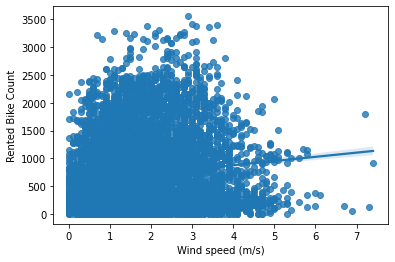

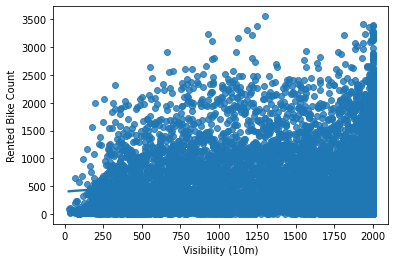

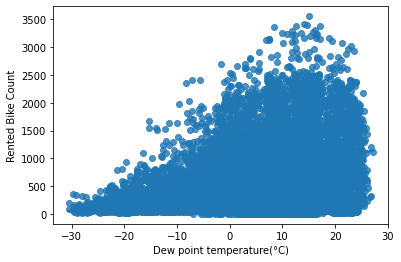

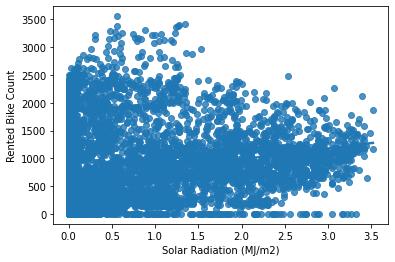

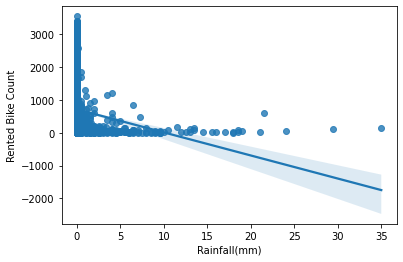

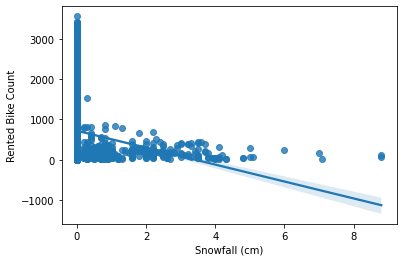

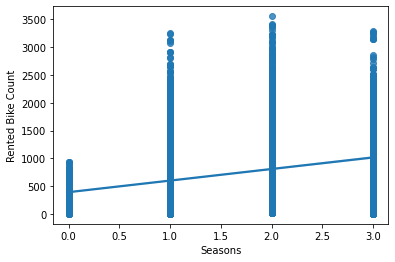

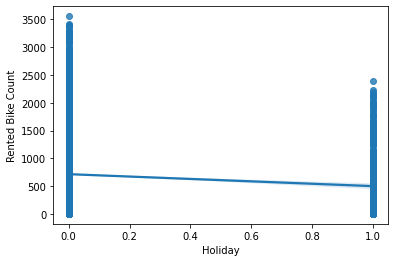

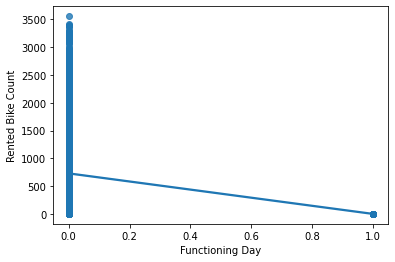

In [ ]:
for feature in data.columns:
    sns.regplot(x=feature,y='Rented Bike Count',data=data)
    plt.xlabel(feature)
    plt.show()
    

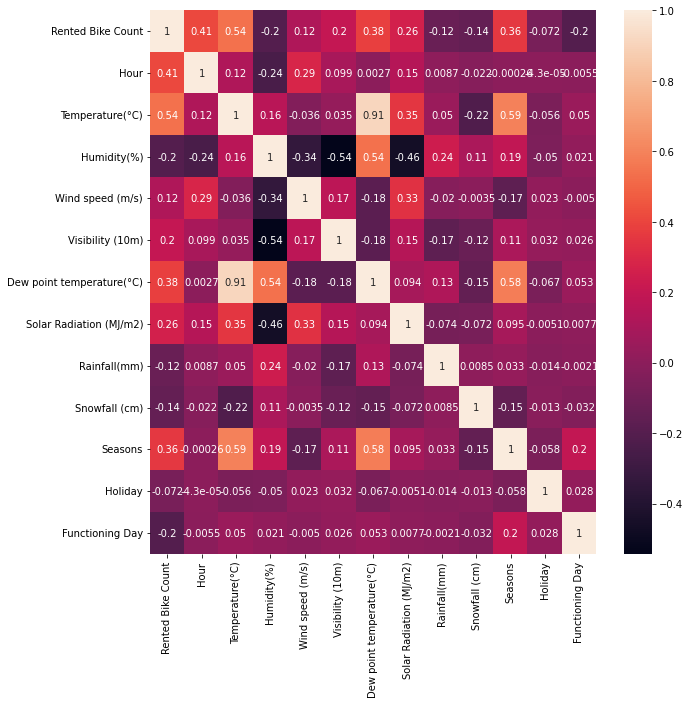

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

Varaibles seems fine to predict the output variable as seen by coorelation plot.

In [ ]:
df2 = data.copy()
df2 = df2.drop(columns=['Dew point temperature(°C)']) 
xtrain,xtest,ytrain,ytest = train_test_split(df2.iloc[:,1:],df2.iloc[:,0],test_size=0.2)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]   
vif['features']=xtrain.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
2,5.363867,Humidity(%)
4,5.279887,Visibility (10m)
8,4.980409,Seasons
3,4.692458,Wind speed (m/s)
1,4.374024,Temperature(°C)
0,3.925788,Hour
5,2.269244,Solar Radiation (MJ/m2)
7,1.118431,Snowfall (cm)
10,1.091398,Functioning Day
6,1.076766,Rainfall(mm)


We generally drop variables with VIF>10 but as can be seen in heatmap of correlations, temperature is most related to the target variable so keeping it and dropping Dew point temperature(°C)

In [ ]:
score_c=pd.DataFrame()
df3=data.copy()
df3=df3.drop(columns=['Dew point temperature(°C)'])

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df3.iloc[:,1:],df3.iloc[:,0],test_size=0.2)
dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

1.0
0.7418703754585371


In [ ]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_notOneHot_NotNormalized_noValidation = pd.Series({
                     'Model_Name': "Dtree_notOneHot_NotNormalized_noValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_c = score_c.append(Dtree_notOneHot_NotNormalized_noValidation, ignore_index=True)

score_c

,Model_Name,R-Squared,RMSE
0,Dtree_notOneHot_NotNormalized_noValidation,0.74187,324.290558


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_not_normalize = ['Rented Bike Count', 'Hour', 'Seasons', 'Holiday', 'Functioning Day']
column_names_to_normalize = [x for x in list(df2) if x not in column_names_to_not_normalize ]
x = df2[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df2_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df2.index)
df2[column_names_to_normalize] = df2_temp
df2.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,204,1,0.215035,0.387755,0.108108,1.0,0.0,0.0,0.0,0,0,0
1,173,2,0.206294,0.397959,0.135135,1.0,0.0,0.0,0.0,0,0,0
2,107,3,0.202797,0.408163,0.121622,1.0,0.0,0.0,0.0,0,0,0
3,78,4,0.206294,0.367347,0.310811,1.0,0.0,0.0,0.0,0,0,0
4,100,5,0.199301,0.377551,0.202703,1.0,0.0,0.0,0.0,0,0,0


In [ ]:
df3 = df2.copy()
df4 = pd.get_dummies(df3, prefix=['Seasons', 'Holiday', 'Functioning Day'], columns=['Seasons', 'Holiday', 'Functioning Day'])
df4.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_0,Seasons_1,Seasons_2,Seasons_3,Holiday_0,Holiday_1,Functioning Day_0,Functioning Day_1
0,204,1,0.215035,0.387755,0.108108,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
1,173,2,0.206294,0.397959,0.135135,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
2,107,3,0.202797,0.408163,0.121622,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
3,78,4,0.206294,0.367347,0.310811,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
4,100,5,0.199301,0.377551,0.202703,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0


In [ ]:
df4.shape

(8759, 17)

In [ ]:
print(df4.isnull().sum())
#NO null values found 

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons_0                  0
Seasons_1                  0
Seasons_2                  0
Seasons_3                  0
Holiday_0                  0
Holiday_1                  0
Functioning Day_0          0
Functioning Day_1          0
dtype: int64


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df4.iloc[:,1:],df4.iloc[:,0],test_size=0.2)
dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

1.0
0.7598840819451949


In [ ]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_OneHot_Normalized_noValidation = pd.Series({
                     'Model_Name': "Dtree_OneHot_Normalized_noValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_c = score_c.append(Dtree_OneHot_Normalized_noValidation, ignore_index=True)

score_c

,Model_Name,R-Squared,RMSE
0,Dtree_notOneHot_NotNormalized_noValidation,0.741870,324.290558
1,Dtree_OneHot_Normalized_noValidation,0.759884,322.368211


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
xtrain2 = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
explained_variance = pca.explained_variance_ratio_
evr=pd.DataFrame()
evr['VIF']=explained_variance*100  
evr['features']=xtrain.columns
evr.sort_values('VIF',ascending=False)
evr.round(2)

,VIF,features
0,97.63,Hour
1,0.59,Temperature(°C)
2,0.53,Humidity(%)
3,0.52,Wind speed (m/s)
4,0.23,Visibility (10m)
5,0.18,Solar Radiation (MJ/m2)
6,0.12,Rainfall(mm)
7,0.12,Snowfall (cm)
8,0.03,Seasons_0
9,0.03,Seasons_1


In [ ]:
from sklearn.decomposition import PCA
xtrain,xtest,ytrain,ytest = train_test_split(df4.iloc[:,1:],df4.iloc[:,0],test_size=0.2)
pca = PCA(n_components=10)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
from sklearn.ensemble import RandomForestClassifier

dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

1.0
0.6743534768235919


In [ ]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_WithPCA = pd.Series({
                     'Model_Name': "Dtree_WithPCA",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_c = score_c.append(Dtree_WithPCA, ignore_index=True)

score_c

,Model_Name,R-Squared,RMSE
0,Dtree_notOneHot_NotNormalized_noValidation,0.741870,324.290558
1,Dtree_OneHot_Normalized_noValidation,0.759884,322.368211
2,Dtree_WithPCA,0.674353,367.546329


In [ ]:
#As we can see , using PCA to get even top 10 features doesn't work and reduces R2 score as when using all features
#I'm using Decision tree and Random forest regressor as we low number of features and large samples

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(df4.iloc[:,1:],df4.iloc[:,0],test_size=0.15)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.176, random_state=1) # 0.176*0.85=0.15

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['mse'],
           'max_depth':range(12,13),
           'min_samples_leaf':range(8,9),
           'min_samples_split':range(2,10)}
gr = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=5,n_jobs=-1)
gr.fit(X_val, y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(12, 13),
                         'min_samples_leaf': range(8, 9),
                        

In [ ]:
gr.best_params_

{'criterion': 'mse',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [ ]:
dtr = DecisionTreeRegressor(criterion='mse',max_depth=12,min_samples_leaf=8,min_samples_split=3).fit(X_train,y_train)
print(dtr.score(X_train,y_train))
print(dtr.score(X_val, y_val))

0.9021165485038544
0.81979102917708


In [ ]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
DTree_withHyperParTuning = pd.Series({
                     'Model_Name': "DTree_withHyperParTuning",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_c = score_c.append(DTree_withHyperParTuning, ignore_index=True)

score_c

,Model_Name,R-Squared,RMSE
0,Dtree_notOneHot_NotNormalized_noValidation,0.741870,324.290558
1,Dtree_OneHot_Normalized_noValidation,0.759884,322.368211
2,Dtree_WithPCA,0.674353,367.546329
3,DTree_withHyperParTuning,0.818656,266.595608


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=7).fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_val, y_val))

0.9720563631400547
0.8473937775929914


In [ ]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
RFR_withValidation = pd.Series({
                     'Model_Name': "RFR_withValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_c = score_c.append(RFR_withValidation, ignore_index=True)

score_c

,Model_Name,R-Squared,RMSE
0,Dtree_notOneHot_NotNormalized_noValidation,0.741870,324.290558
1,Dtree_OneHot_Normalized_noValidation,0.759884,322.368211
2,Dtree_WithPCA,0.674353,367.546329
3,DTree_withHyperParTuning,0.818656,266.595608
4,RFR_withValidation,0.842095,248.770958


In [ ]:
from sklearn.model_selection import cross_val_score
score=[]
for n in range(1,100):
    rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1)
    rfrscore = cross_val_score(rfr,X_train,y_train,cv=5).mean()
    score.append(rfrscore)

In [ ]:
print(max(score),score.index(max(score)))

0.8675927112701161 96


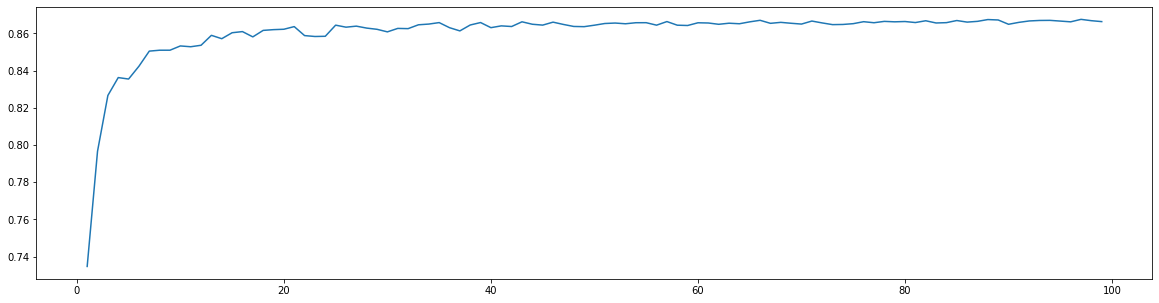

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=range(1,100),y=score)
plt.show()

In [ ]:
rfr = RandomForestRegressor(n_estimators=74,n_jobs=-1).fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_val, y_val))
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
RFR_with_HyperparaTuning = pd.Series({
                     'Model_Name': "RFR_with_HyperparaTuning",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

0.9818313581287307
0.8605641524487027


In [ ]:
score_c = score_c.append(RFR_with_HyperparaTuning, ignore_index=True)
score_c

,Model_Name,R-Squared,RMSE
0,Dtree_notOneHot_NotNormalized_noValidation,0.741870,324.290558
1,Dtree_OneHot_Normalized_noValidation,0.759884,322.368211
2,Dtree_WithPCA,0.674353,367.546329
3,DTree_withHyperParTuning,0.818656,266.595608
4,RFR_withValidation,0.842095,248.770958
5,RFR_with_HyperparaTuning,0.868342,227.156193


## Question 4

In [ ]:
all_files = ['/content/drive/MyDrive/0.csv', '/content/drive/MyDrive/1.csv', '/content/drive/MyDrive/2.csv', '/content/drive/MyDrive/3.csv']
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [ ]:
frame.columns = frame.columns.map(str)
#frame=frame.rename(columns = {0:'a',64:'new_name'})
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [ ]:
#As gestures classes is integer, it is discrete dataype, it is a supervised problem , last column(classes) is the target variable
#As this would a classification task, taking Accuracy and F1 score as performance criteria

In [ ]:
print(data.isnull().sum())
#No null values

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


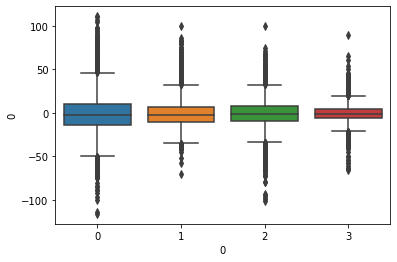

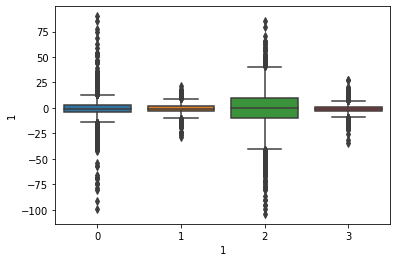

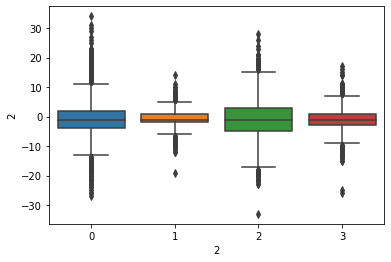

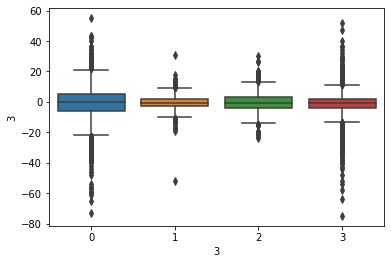

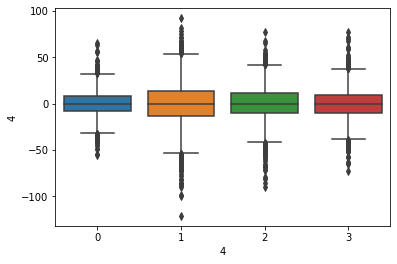

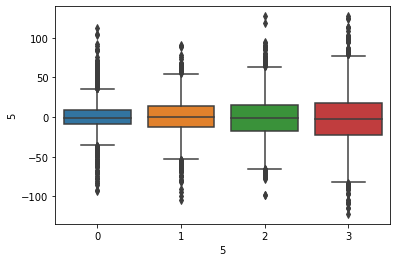

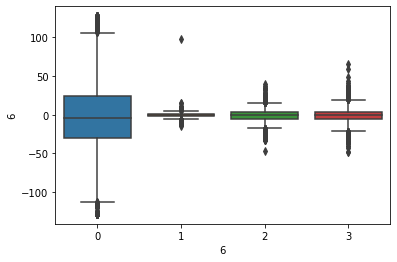

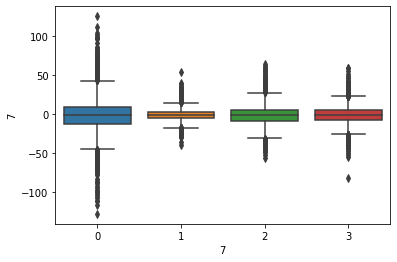

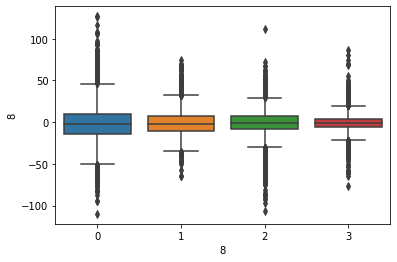

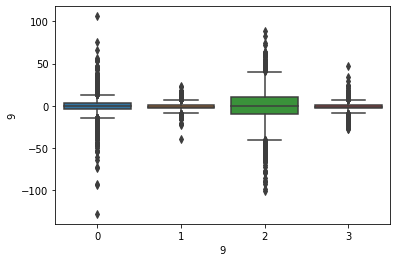

In [ ]:
data=frame.copy()
for feature in data.columns[:10]:
    sns.boxplot(x="64", y=feature, data=data)
    plt.xlabel(feature)
    plt.show()

In [ ]:
df2 = data.copy()
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(df2.iloc[:,1:],df2.iloc[:,0],test_size=0.2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]   
vif['features']=xtrain.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
27,2.551931,28
19,2.513582,20
35,2.484560,36
43,2.465748,44
26,2.301049,27
...,...,...
55,1.464097,56
56,1.457287,57
7,1.440428,8
63,1.394675,64


In [ ]:
#We generally drop variables with VIF>10 but as can be seen there are no feature with >10VIF, so we won't drop any feature
#Initial try with decision trees regressor
score_c = pd.DataFrame()

In [ ]:
df2 = data.copy()
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [ ]:
X = df2.iloc[:,:64].values
Y = df2.iloc[:,64].values

In [ ]:
df4 = df2.copy()
from sklearn.decomposition import PCA
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)
pca = PCA(n_components=45)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = SVC().fit(xtrain,ytrain)
y_pred = clf.predict(xtest)
f1score = (f1_score(ytest, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (clf.score(xtest,ytest))
RFC_initial = pd.Series({
                     'Model_Name': "RFC_initial",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_c = score_c.append(RFC_initial, ignore_index=True)

score_c

,Accuracy,Model_Name,f1_score
0,0.863014,RFC_initial,0.861695


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold=-np.inf, max_features=45)
X_trans = trans.fit_transform(X, Y)
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, X_trans.shape[1]))

We started with 63 features but retained only 45 of them!


In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X_trans,Y,test_size=0.15)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.176, random_state=1) # 0.176*0.85=0.15

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
clf = SVC().fit(X_train,y_train)
# print(clf.score(X_train,y_train))
# print(clf.score(X_val,y_val))
y_pred = clf.predict(X_val)
f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (clf.score(X_val, y_val))
SVC_initial = pd.Series({
                     'Model_Name': "SVC_initial",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_c = score_c.append(SVC_initial, ignore_index=True)

score_c = score_c[['Model_Name', 'f1_score','Accuracy' ]]
score_c

,Model_Name,f1_score,Accuracy
0,RFC_initial,0.861695,0.863014
1,SVC_initial,0.858636,0.859187


In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_SVC = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid_SVC.fit(X_val,y_val) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   48.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
# print best parameter after tuning 
print(grid_SVC.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_SVC.best_estimator_) 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
y_pred = grid_SVC.predict(X_val) 

f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (grid_SVC.score(X_val, y_val))
SVC_HyperTuning = pd.Series({
                     'Model_Name': "SVC_HyperTuning",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_c = score_c.append(SVC_HyperTuning, ignore_index=True)

score_c = score_c[['Model_Name', 'f1_score','Accuracy' ]]
score_c

,Model_Name,f1_score,Accuracy
0,RFC_initial,0.861695,0.863014
1,SVC_initial,0.858636,0.859187
2,SVC_HyperTuning,1.000000,1.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
dtree_model = clf.fit(X_train, y_train) 
print(clf.score(X_train, y_train))

1.0


In [ ]:
y_pred = dtree_model.predict(X_val) 
from sklearn.metrics import f1_score
# print(f1_score(y_test, y_pred,average='weighted'))
# print(clf.score(X_test, y_test))

f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (dtree_model.score(X_val, y_val))
DTC_initial = pd.Series({
                     'Model_Name': "DTC_initial",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_c = score_c.append(DTC_initial, ignore_index=True)

score_c = score_c[['Model_Name', 'f1_score','Accuracy' ]]
score_c

,Model_Name,f1_score,Accuracy
0,RFC_initial,0.861695,0.863014
1,SVC_initial,0.858636,0.859187
2,SVC_HyperTuning,1.000000,1.000000
3,DTC_initial,0.788679,0.787064


In [ ]:
from sklearn.model_selection import GridSearchCV 
from scipy.stats import randint
# defining parameter range 
param_grid = { 'criterion' : ['gini', 'entropy'],
              "max_features": np.arange(1, 9),
              "min_samples_leaf": np.arange(1, 9),
    'max_depth' : [2,4,6,8,10,12]
    }  
  
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_val,y_val) 

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:   20.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks af"ter hyper-parameter tuning 
print(grid.best_estimator_) 

{'criterion': 'gini', 'max_depth': 12, 'max_features': 7, 'min_samples_leaf': 4}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
y_pred = grid.predict(X_val) 
# print(f1_score(y_test, y_pred,average='weighted'))
# print(clf.score(X_test, y_test))


f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (grid.score(X_val, y_val))
DTC_HyperTuning = pd.Series({
                     'Model_Name': "DTC_HyperTuning",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_c = score_c.append(DTC_HyperTuning, ignore_index=True)

score_c = score_c[['Model_Name', 'f1_score','Accuracy' ]]
score_c

,Model_Name,f1_score,Accuracy
0,RFC_initial,0.861695,0.863014
1,SVC_initial,0.858636,0.859187
2,SVC_HyperTuning,1.000000,1.000000
3,DTC_initial,0.788679,0.787064
4,DTC_HyperTuning,0.831717,0.832284


In [ ]:
#So the best model is SVC_HyperTuning, Checking test scores for this model
y_pred = grid_SVC.predict(X_test)
print(f1_score(y_test, y_pred,average='weighted'))
print(grid_SVC.score(X_test, y_test))


0.82070564920631
0.821917808219178


In [ ]:
#Accuracy of test set is 80%, which is decent and model is usable

## Question 5

In [ ]:
x_values  = df2.iloc[:,:64].values
y_values = df2.iloc[:,64].values

In [ ]:
from sklearn.decomposition import PCA
loss_list=[]
x = np.linalg.norm(X, axis=0)
stnd_dev = np.std(x)
required_feat = 0

for i in range(64):
    pca = PCA(n_components=i+1)
    X_train_pca = pca.fit_transform(X)
    X_projected = pca.inverse_transform(X_train_pca)
    loss =  ((X - X_projected) ** 2).mean()
    #print(loss)
    if ((loss<(0.01*stnd_dev)) & (required_feat==0)):
        required_feat = i+1

    loss_list.append(loss)

In [ ]:
print('Features required for given criteria: ', required_feat)

Features required for given criteria:  48


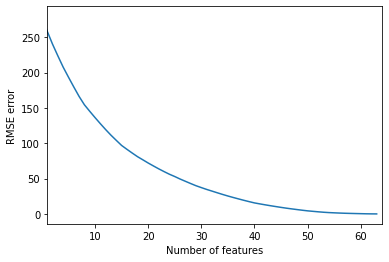

In [ ]:
plt.plot(loss_list)
plt.xlabel('Number of features')
plt.ylabel('RMSE error')
plt.xlim(1,64)
plt.show()